# Logistic Regression - Linear Classifier for Non-Linear Data


In the lecture we have shown that Logistic Regression is a **linear classifier**. Then, how does it classify non-linear data?

In this recitation you will train a Logistic Regression classifier on a non-linear dataset. The main questions that you will try to understand is: 
- How does a linear classifier define the decision boundary for non-linear data?
- Is the decision boundary on a non-linear data linear?

For a dataset that is not linearly separable you need to augment the feature matrix by adding higher order polynomial terms. The augmented feature space allows the model to create a linear separation of the classes (i.e., to create a linear decision boundary). By using contour plots of the decision boundary on a high-dimensional (feature augmented) dataset, you will be able to understand the "linear classification" of a non-linear dataset by the Logistic Regression model.

For better understanding you will create visualization of the decision boundary of your model.

To plot the decision boundary, you will use the the following two functions from "Logistic Regression-1-Binary Classification" notebook:
- decision_boundary_various_thresholds
- decision_boundary_class_colored

Please read the detailed notes on these two functions from the notebook.


### Scikit-Learn Logistic Regression Model

You will need to set the following two parameters to use the Scikit-Learn LogisticRegression model.
- solver
- C

For the solver, you may use the "liblinear" algorithm.

The strength of the regularization is controlled by the hyperparameter C. The higher the value of C, the less the model is regularized.


## Tasks
1. Train a linear model, evaluate train & test performance, plot decision boundary using two functions
2. Find the optimal polynomial model and train it, evaluate train & test performance, plot decision boundary using two functions

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt


from sklearn.datasets.samples_generator import make_circles

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, precision_recall_curve, classification_report
from sklearn.model_selection import train_test_split

# Function for Plotting Decision Bounday 

Logistic Regression is a **linear classifier**. 

To better understand how Logistic Regression creates linear decision boundary, we need to **<font color=red size=6> visualize </font>** it.

We provide two techniques for plotting the class decision boundary for a multi-class classification problem.

1. Using Various Thresholds for a Class Probability 
2. Using Class Prediction 

The 1st technique is useful for understanding the decision boundaries at various thresholds. It reveals the scope of the solution space. We use the function "decision_boundary_various_thresholds" to plot this decision boundary

The 2nd technique is simple and easy to extend for non-linear dataset. We will use it more often. We use the function "decision_boundary_class_colored" to plot this decision boundary. Note that for multi-class classification, the "plotDistanceFromHyperplane" attribute should be set to False.

A detail discussion on these two functions are provided in the "Logistic Regression-1-Binary Classification" notebook.

In [2]:
def decision_boundary_various_thresholds(clf, X):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)

    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]

    # Compute the estimates for 2 classes for all new points
    y_proba = clf.predict_proba(X_new)

    
    # We only use the estimate for the class Iris-Virginica
    zz = y_proba[:, 1].reshape(x1.shape)

    # Generate the contour plot for the estimates of class 1
    contour = plt.contour(x1, x2, zz, cmap=plt.cm.brg)

    plt.clabel(contour, inline=1, fontsize=12)
    
    
def decision_boundary_class_colored(clf, X, plotDistanceFromHyperplane=False):
    
    # Get the min and max value of feature x1
    x1min, x1max = X[:,0].min() - 1, X[:, 0].max() + 1
    
    # Get the min and max value of feature x2
    x2min, x2max = X[:,1].min() - 1, X[:, 1].max() + 1
    
    # Create the mesh grid
    x1s = np.linspace(x1min, x1max, 100)
    x2s = np.linspace(x2min, x2max, 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    
    
    # Create pairs of new points from the grid
    X_new = np.c_[x1.ravel(), x2.ravel()]
    
    
    # Compute the class predictions for all new points
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    
    # Generate the contourf plot for the predictions
    plt.contourf(x1, x2, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    
    
    if(plotDistanceFromHyperplane == True):
    
        # Compute the signed distance of a sample to the hyperplane for all new points
        y_decision = clf.decision_function(X_new).reshape(x1.shape)

        # Generate the contourf plot for the distance of all points from the hyperplane
        plt.contourf(x1, x2, y_decision, cmap=plt.cm.bwr, alpha=0.2)
    
    plt.colorbar()
    


# Synthetic Dataset

You will use the Scikit-Learn's "datasets.make_circles" function to generate a synthetic non-linear dataset that is suitable for investigating classification (as well as clustering) models. It provides better visualization of the classifier performance.


You will use the following two parameters of the make_circles function:

- factor : Scale factor between inner and outer circle. Range 0 ~ 1.

- noise : Standard deviation of Gaussian noise added to the data.

## Load The Data and Visualiize 

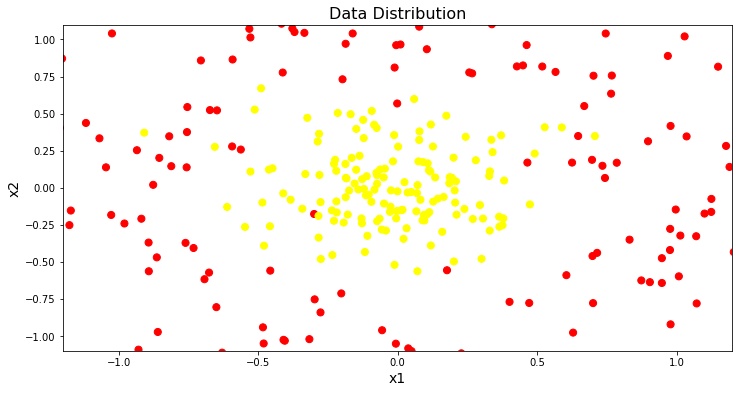

In [3]:
X, y = make_circles(300, factor=0.1, noise=0.25)
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.title("Data Distribution", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.axis([-1.2, 1.2, -1.1, 1.1])
plt.show()

## Split Data into Train-Test Set

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(240, 2)
(60, 2)
(240,)
(60,)


## Create A Scatter Plot of Train and Test Data  (10 pts)

On the same figure plot both the train and test data. 

To separately show the test data, use black "edgecolors" and slightly bigger marker size (using the "s" parameter).

More info on the parameters of matplotlib scatter plot.

https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html

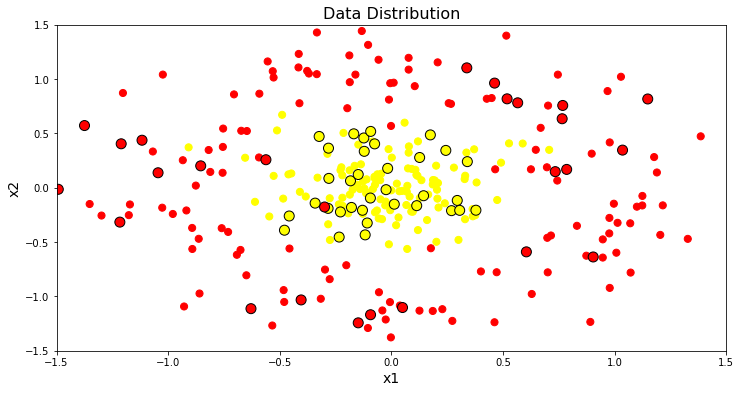

In [5]:


plt.figure(figsize=(12, 6))

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50, cmap='autumn')
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=100,edgecolors= 'black', cmap='autumn')

plt.title("Data Distribution", fontsize=16)
plt.xlabel("x1", fontsize=14)
plt.ylabel("x2", fontsize=14)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.show()

## Task 1 (20 pts)

Train a linear model.

- Compute Training accuracy
- Plot the decision boundary using two functions (there should be two plots)
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report


Accuracy:  0.38333333333333336


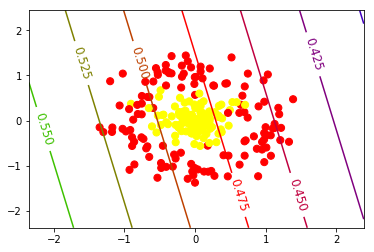

In [6]:
lg_reg = LogisticRegression(C=1, solver='liblinear')


lg_reg.fit(X_train, y_train)

y_pred_train = lg_reg.predict(X_train)

accuracy_score_train = np.mean(y_pred_train == y_train)
print("\nAccuracy: ", accuracy_score_train)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50, cmap='autumn')
decision_boundary_various_thresholds(lg_reg, X_train)


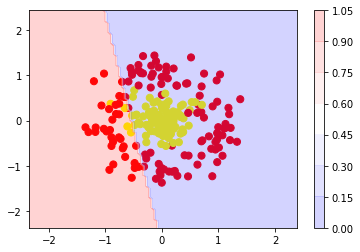

In [7]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50, cmap='autumn')
decision_boundary_class_colored(lg_reg, X_train)

In [8]:
y_test_predicted = lg_reg.predict(X_test)
#print(y_test_predict)

accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\nAccuracy: ", accuracy_score_test)


print("\nTest Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\nTest Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print("Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Test F1 Score = %f" % f1_test)


print("\nClassification Report:")
print(classification_report(y_test, y_test_predicted))


Accuracy:  0.3

Test Confusion Matrix:
[[17  9]
 [33  1]]

Test Precision = 0.100000
Test Recall = 0.029412
Test F1 Score = 0.045455

Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.65      0.45        26
           1       0.10      0.03      0.05        34

   micro avg       0.30      0.30      0.30        60
   macro avg       0.22      0.34      0.25        60
weighted avg       0.20      0.30      0.22        60



## Task 2 (5 + 15  + 40 = 60)

- Choose the optimal polynomial model.

        -- Split the training data into training and validation fold (80%-20%). Vary the degree of the polynomial and train the Logistic Regression model using the training fold data. Then, compute the accuracy (use the "score" function) for the validation fold data using the models with varying degree. Finally, plot the accuracy values against the varying degree. From this plot find the optimal degree (that gives the highest validation fold accuracy).

- Train the optimal polynomial model
- Compute Training accuracy
- Plot the decision boundary using two functions (there should be two plots)
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report




### Choose the Optimal Polynomial Model

You may vary the degree of the polynomial from 2 to 20.

Try the "liblinear" solver.

It is good to vary the hyperparameter "C" to see how it influences the test accuracy. For me "C=1" worked well.

#### Split Training data into Traing and Validation Fold (5 pts)

In [9]:
degreeList = np.arange(2,21,1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)


#### Model Selection: Optimal Polynomial Degree (15 pts)

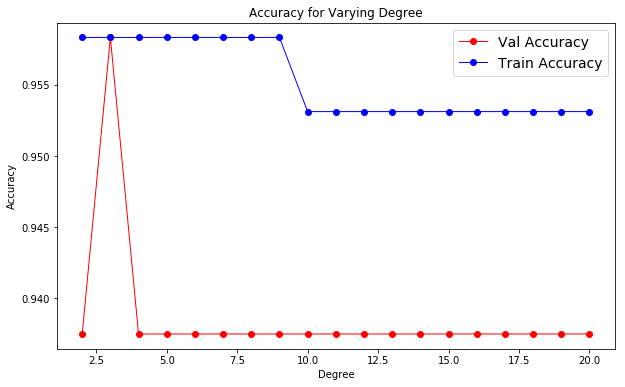

In [10]:
acc_train, acc_val = [], []

for degree in degreeList:

    model = make_pipeline(PolynomialFeatures(degree, include_bias=False), StandardScaler(), lg_reg) 
  
    model.fit(X_train, y_train)
       
    # Make prediction 
    y_train_predicted = model.predict(X_train)
    y_val_predicted = model.predict(X_val)
    
    
    acc_train.append(np.mean(y_train_predicted == y_train))
    acc_val.append(np.mean(y_val_predicted == y_val))
   

plt.figure(figsize=(10, 6))   
plt.plot(degreeList, acc_val, "ro-", alpha=1.0, linewidth=1.0, label="Val Accuracy")
plt.plot(degreeList, acc_train, "bo-", alpha=1.0, linewidth=1.0, label="Train Accuracy")    
plt.legend(loc="best", fontsize=14) 
plt.xlabel("Degree")
plt.ylabel("Accuracy")
plt.title("Accuracy for Varying Degree")
plt.show()

## Choose the Best Model (40 pts)

- Train the optimal polynomial model
- Compute Training accuracy
- Plot the decision boundary using two functions (there should be two plots)
- Compute test accuracy, confusion matrix, precision, recall, f1 score and classification report

Accuracy for optimal model:  0.9583333333333334


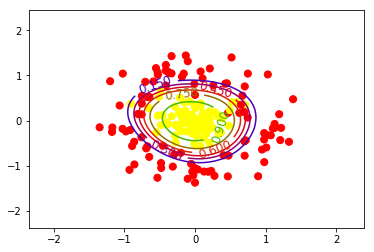

In [13]:


optimal_model = make_pipeline(PolynomialFeatures(3, include_bias=False), StandardScaler(),lg_reg ) 
optimal_model.fit(X_train, y_train)

y_train_predicted = optimal_model.predict(X_train)
best_accuracy= np.mean(y_train_predicted == y_train)

print("Accuracy for optimal model: ", best_accuracy)

plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50, cmap='autumn')
decision_boundary_various_thresholds(optimal_model, X_train)       
        


 Optimal Model Accuracy:  0.9666666666666667

 Optimal Model Test Confusion Matrix:
[[24  2]
 [ 0 34]]

 Optimal Model Test Precision = 0.944444
 Optimal Model Test Recall = 1.000000
Optimal Model Test F1 Score = 0.971429

 Optimal Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        26
           1       0.94      1.00      0.97        34

   micro avg       0.97      0.97      0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



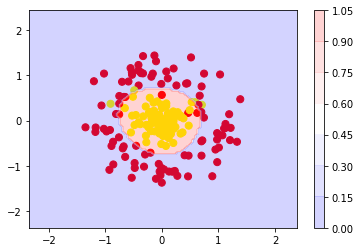

In [14]:
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, s=50, cmap='autumn')
decision_boundary_class_colored(optimal_model, X_train)

y_test_predicted = optimal_model.predict(X_test)


accuracy_score_test = np.mean(y_test_predicted == y_test)
print("\n Optimal Model Accuracy: ", accuracy_score_test)


print("\n Optimal Model Test Confusion Matrix:")
print(confusion_matrix(y_test, y_test_predicted))


precision_test = precision_score(y_test, y_test_predicted) 
print("\n Optimal Model Test Precision = %f" % precision_test)

recall_test = recall_score(y_test, y_test_predicted)
print(" Optimal Model Test Recall = %f" % recall_test)


f1_test = f1_score(y_test, y_test_predicted)
print("Optimal Model Test F1 Score = %f" % f1_test)


print("\n Optimal Model Classification Report:")
print(classification_report(y_test, y_test_predicted))

# Observations (10 pts)

- Summarize your observations from the two tasks
#### Answer: 

##### Observation for Task 1:
I have trained the Logistic Regresson model with C = 1 and 'linlinear' solver and achieved Train Accuracy:  0.38333333333333336 and Test Accuracy:  0.3. Previously, I accuracies were higher with same models. I had run the model too many times and observed accuracy change. I believe that it can be because of that make_circles function generates different data everytime.

##### Observation for Task 2:
To find the optimal model, I have varied degrees between 2 to 20 and found that degree 3 gave me best training and validation accuracy according to the varying degree graph I plotted.  I got 0.9583333333333334 train accuracy and 0.9666666666666667 test accuracy for optimal model with degree 3. 

As mentioned earlier, I had restarted my kernel many times due to which data changed. Sometimes, the plot of varying degree and accuracy gave me same accuracies for both train and validation sets. I have also got the degree 2 as my optimal degree. But in the last run I got degree 3 as my optimal degree. 



- What type of decision boundary (linear/non-linear) is created by your polynomial model? Explain.
#### Answer:  
Polynomial model has made non-linear decision boundary on the 2D plane. But if we project model on higher dimension , like 3 dimension. We can linearly separate the boundary via a 2 dimension plane.